# Plotting BARRA FFDI thresholds vs GWL1.2 

In [1]:
# importing sys
import sys
# adding plotting module to the system path
sys.path.insert(0, '/g/data/xv83/rxm599/acs/plotting_maps')
# import ACS plotting maps and Xarray.
from acs_plotting_maps import plot_acs_hazard, regions_dict, cmap_dict, tick_dict

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import dask

In [2]:
# Start Cluster 
from dask.distributed import Client
# Set configuration options
dask.config.set({
    'distributed.comm.timeouts.connect': '90s',  # Timeout for connecting to a worker
    'distributed.comm.timeouts.tcp': '90s',  # Timeout for TCP communications
})

client = Client()
client

2024-08-22 18:43:16,714 - distributed.preloading - INFO - Creating preload: /g/data/hh5/public/apps/dask-optimiser/schedplugin.py
2024-08-22 18:43:16,716 - distributed.utils - INFO - Reload module schedplugin from .py file
2024-08-22 18:43:16,735 - distributed.preloading - INFO - Import preload module: /g/data/hh5/public/apps/dask-optimiser/schedplugin.py


Modifying workers


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /node/gadi-cpu-clx-1728.gadi.nci.org.au/31863/proxy/8787/status,
Dashboard: /node/gadi-cpu-clx-1728.gadi.nci.org.au/31863/proxy/8787/status,Workers: 24
Total threads: 24,Total memory: 0 B
Status: running,Using processes: True
Comm: tcp://127.0.0.1:36861,Workers: 24
Dashboard: /node/gadi-cpu-clx-1728.gadi.nci.org.au/31863/proxy/8787/status,Total threads: 24
Started: Just now,Total memory: 0 B
Comm: tcp://127.0.0.1:36769,Total threads: 1
Dashboard: /node/gadi-cpu-clx-1728.gadi.nci.org.au/31863/proxy/42317/status,Memory: 0 B
Nanny: tcp://127.0.0.1:43679,


In [10]:
import warnings
warnings.filterwarnings('ignore')

#  Plot


In [3]:
# Plot GWL1.2 threshold
dsG1=xr.open_dataset('/g/data/ia39/ncra/fire/GWL1p2_threshold_50.nc')
dsG2=xr.open_dataset('/g/data/ia39/ncra/fire/GWL1p2_threshold_75.nc')

# Plot BARRA threshold
dsB=xr.open_dataset('/g/data/ia39/ncra/fire/AGCD-05i_BOM_ERA5_historical_hres_BARRA-R2_v1_day_ffdi_threshold.nc')


In [16]:
d1=dsG1.rename({'days50':'mdays50'})
d2=dsG2.rename({'days75':'mdays75'})
dall=xr.merge([dsB,d1,d2])
dall

<xarray.Dataset> Size: 25MB
Dimensions:  (lat: 691, lon: 886)
Coordinates:
  * lat      (lat) float64 6kB -44.5 -44.45 -44.4 -44.35 ... -10.1 -10.05 -10.0
  * lon      (lon) float64 7kB 112.0 112.0 112.1 112.2 ... 156.2 156.2 156.2
    period   int64 8B 0
Data variables:
    days50   (lat, lon) float64 5MB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    days75   (lat, lon) float64 5MB ...
    days100  (lat, lon) float64 5MB ...
    mdays50  (lat, lon) float64 5MB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    mdays75  (lat, lon) float64 5MB ...

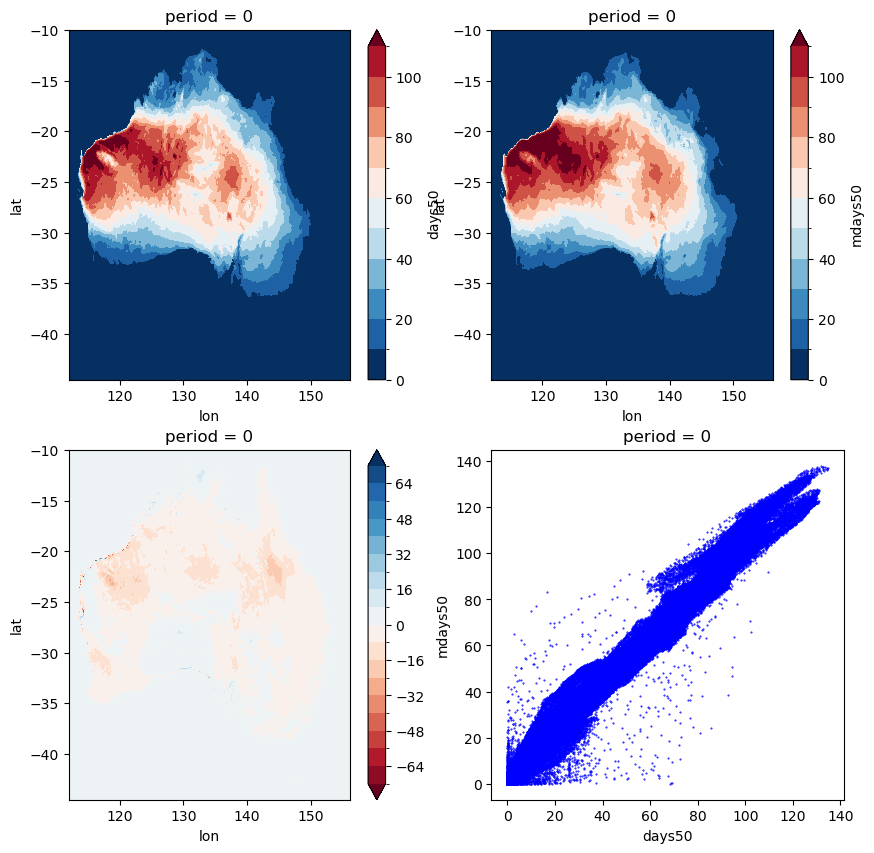

In [74]:
lev=range(0,120,10) 
plt.figure(figsize=(10,10))
plt.subplot(2,2,1); dall.days50.plot(cmap='RdBu_r',levels=lev)
plt.subplot(2,2,2); dall.mdays50.plot(cmap='RdBu_r',levels=lev)

a=dall.days50-dall.mdays50
plt.subplot(2,2,3); a.plot(cmap='RdBu',levels=20,extend='both')

plt.subplot(2,2,4)
dall.plot.scatter(x="days50", y="mdays50",s=.21, color= 'b')


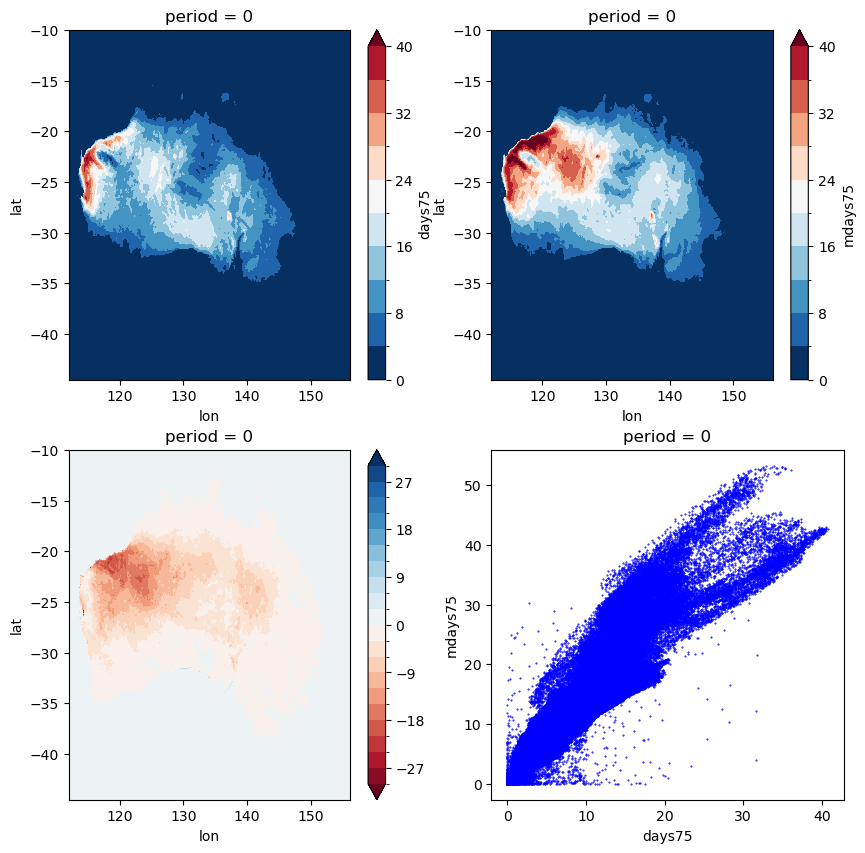

In [76]:
lev=range(0,44,4) 
plt.figure(figsize=(10,10))
plt.subplot(2,2,1); dall.days75.plot(cmap='RdBu_r',levels=lev)
plt.subplot(2,2,2); dall.mdays75.plot(cmap='RdBu_r',levels=lev)

a=dall.days75-dall.mdays75
plt.subplot(2,2,3); a.plot(cmap='RdBu',levels=20,extend='both')

plt.subplot(2,2,4)
dall.plot.scatter(x="days75", y="mdays75",s=.21, color= 'b')
